# GGIS 407 - Final Project
# Topic: Income_level vs Food_expenditure_share

## Overview of problem
In this project,I will be exploring the **relationship between household income levels and food
expenditure across different U.S. states.** I would like to check if the situtation in U.S supports engel's law which explains that as a household's income increases, the percentage of that income spent on food decreases.

## Overview of Data Source

### Median Household Income Data(Based in 2023)
[Data Source](https://hdpulse.nimhd.nih.gov/data-portal/social/table?age=001&age_options=ageall_1&demo=00011&demo_options=income_3&race=00&race_options=race_7&sex=0&sex_options=sexboth_1&socialtopic=030&socialtopic_options=social_6&statefips=00&statefips_options=area_states)

This data contains information on median incomes across states,I chose **median** instead
of the mean because it reduces the influence of extremely wealthy people.

### Food Expenditure Share Data(Based in 2023)
[Data Source](https://www.consumeraffairs.com/movers/grocery-cost-report.html#:~:text=across%20the%20U.S.-,See%20how%20much%20monthly%20income%20went%20to,every%20U.S.%20state%20in%202023&text=Hawaii%20and%20Alaska%2C%20known%20for,incomes%20on%20groceries%20in%2023) (This link will direct you to an article, which I collected data from a map there)
This data contains state-level numerical information on the proportion of household spending
allocated to food.

### Spatial data
Furthuremore, I will use spatial data from
"/home/jovyan/shared_data/data/geog407/lab3/" in week-3 class to help creating maps.

#### Below are works I have done.

## Import Median household income data

In [39]:
# Median household income data
import pandas as pd
df = pd.read_csv('median_income.csv')
# Data Cleaning:Rename columns
df_income =df.rename(columns={'Value (Dollars)': 'median_income',
                              'Rank within US (of 52 states)':'rank','State':'state'})
# Data Cleaning:Change the type of values in "median_income" to float
df_income['median_income'] = df_income['median_income'].str.replace(',', '').astype(float)
df_income.head()

state   FIPS  median_income  rank
0    Mississippi  28000        54915.0    51
1  West Virginia  54000        57917.0    50
2       Arkansas   5000        58773.0    49
3      Louisiana  22000        60023.0    48
4        Alabama   1000        62027.0    47

## Check if the data is good

In [40]:
# There are 50 rows and 4 columns
df_income.shape

(50, 4)

In [41]:
# See if there is missing value, the result is good.
df_income.isna().sum()

state            0
FIPS             0
median_income    0
rank             0
dtype: int64

### Data visualizations

In [42]:
# Data types of all columns look good
df_income.dtypes

state             object
FIPS               int64
median_income    float64
rank               int64
dtype: object

In [43]:
# Simple visualization
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 0, 'median income($)')

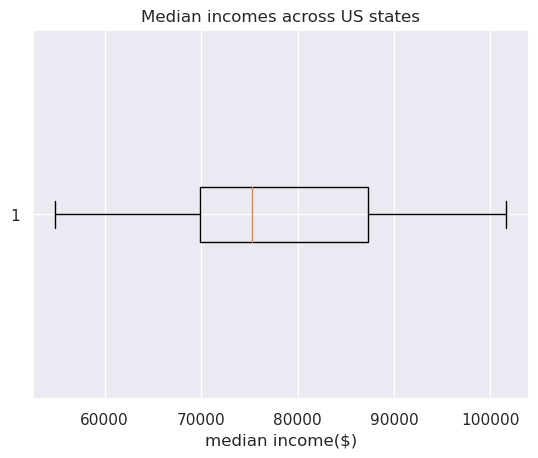

In [44]:
# Boxplot for median_income is best for visualizing numerical data
# As you can see, Q2 lies in leftward
plt.boxplot(df_income['median_income'],vert=False)
plt.title("Median incomes across US states")
plt.xlabel("median income($)")

#### Insight: Darker states represent higher income(eg.California) while lighter states represent lower income(eg.Mississippi).

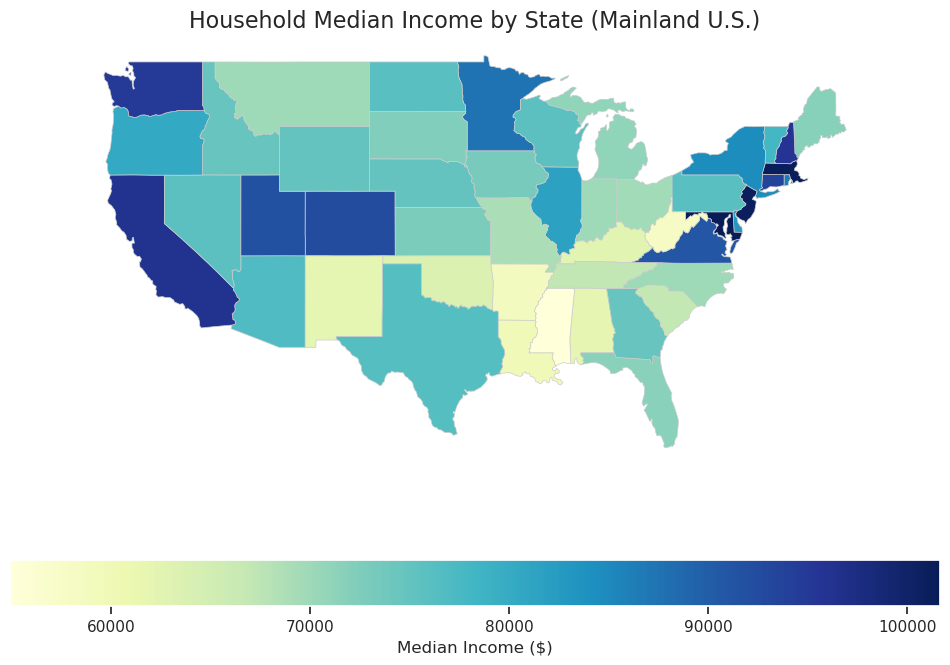

In [45]:
# Map visualization
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Set environment variable needed for basemap
os.environ["PROJ_LIB"] = r"/opt/conda/pkgs/proj4-5.2.0-he1b5a44_1006/share/proj"

# Define data path
data_path = "/home/jovyan/shared_data/data/geog407/assignment3/"

# Load geographic and income data
state_geo = f"{data_path}/us-states.json"
gdf_states = gpd.read_file(state_geo)

# Merge shapefile and income dataframe
gdf_merged = gdf_states.merge(df_income, left_on="name", right_on="state")

# Exclude Alaska and Hawaii to aviod scaling issue.
gdf_contig = gdf_merged[~gdf_merged["name"].isin(["Alaska", "Hawaii"])]

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
gdf_contig.plot(
    column="median_income",
    cmap="YlGnBu",
    edgecolor="0.8",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Median Income ($)",
        "orientation": "horizontal"
    },
    ax=ax
)

# Add title
ax.set_title("Household Median Income by State (Mainland U.S.)", fontsize=16)
ax.axis("off")
# Show the plot

plt.show()


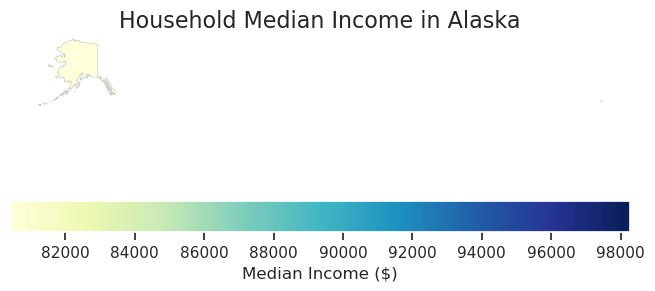

In [46]:
# Filter for Alaska only
gdf_alaska = gdf_merged[gdf_merged["name"] == "Alaska"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Alaska's median income
gdf_alaska.plot(
    column="median_income",
    cmap="YlGnBu",
    edgecolor="0.8",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Median Income ($)",
        "orientation": "horizontal"
    },
    ax=ax
)

# Add title and remove axis
ax.set_title("Household Median Income in Alaska", fontsize=16)
ax.axis("off")

# Show the map
plt.show()


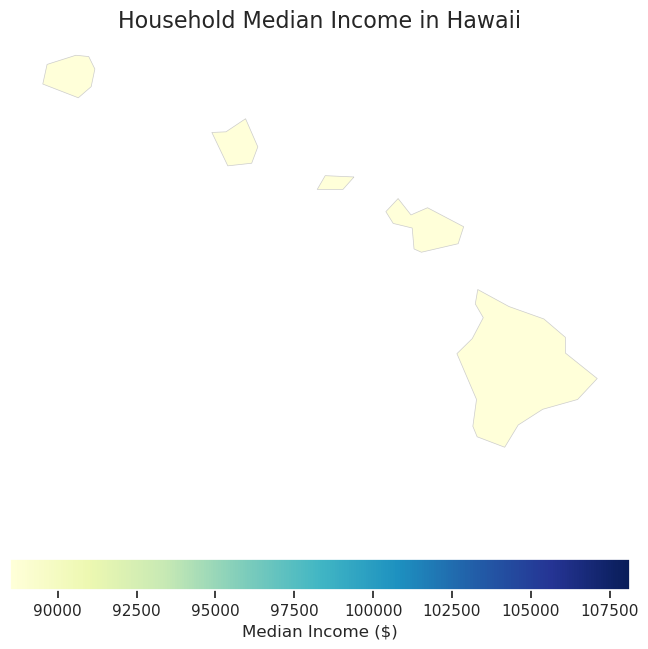

In [47]:
# Filter for Hawaii only
gdf_hawaii = gdf_merged[gdf_merged["name"] == "Hawaii"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Hawaii's median income
gdf_hawaii.plot(
    column="median_income",
    cmap="YlGnBu",
    edgecolor="0.8",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "Median Income ($)",
        "orientation": "horizontal"
    },
    ax=ax
)

# Add title and remove axis
ax.set_title("Household Median Income in Hawaii", fontsize=16)
ax.axis("off")

# Show the map
plt.show()


In [48]:
# Create interactive map using folium
import pandas as pd
import folium
import json

# Define data path
data_path = "/home/jovyan/shared_data/data/geog407/assignment3/"
state_geo = f"{data_path}/us-states.json"

# Load GeoJSON
with open(state_geo) as f:
    geo_data = json.load(f)

# Add median_income into the GeoJSON to display it in popups
for feature in geo_data["features"]:
    state_name = feature["properties"]["name"]
    match = df_income[df_income["state"] == state_name]
    if not match.empty:
        # Get the first (and only) value from the match
        feature["properties"]["median_income"] = int(match["median_income"].values[0])
    else:
        feature["properties"]["median_income"] = None

# Make the base map
m = folium.Map(location=[48, -102], zoom_start=3)

# Add Choropleth layer
choropleth = folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=df_income,
    columns=["state", "median_income"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Median Income ($)",
).add_to(m)

# Hover tooltip to see state names
folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State:"],
    sticky=True
).add_to(choropleth.geojson)

# Click popup to show both name and income
folium.GeoJsonPopup(
    fields=["name", "median_income"],
    aliases=["State:", "Median Income:"],
    localize=True
).add_to(choropleth.geojson)

# Add layer control
folium.LayerControl().add_to(m)

# Display map in notebook
m

# Save map as HTML
#m.save("Median_income_map.html")

In [ ]:
# Display my folium map
from IPython.display import Image
Image("Median_income_map.png")

### Import Food Expenditure share data

In [50]:
# Food Expenditure share data
df_share = pd.read_csv('states_food_share.csv')
df_share.head()

state  average_percentage_of_income_on_food
0    Mississippi                                  0.20
1  West Virginia                                  0.16
2       Arkansas                                  0.17
3      Louisiana                                  0.18
4        Alabama                                  0.17

### Check if the dataset is good

In [51]:
# There are 50 rows and 2 columns
df_share.shape

(50, 2)

In [52]:
# See if there is missing value, the result is good.
df_share.isna().sum()

state                                   0
average_percentage_of_income_on_food    0
dtype: int64

In [53]:
# Data types of all columns look good
df_share.dtypes

state                                    object
average_percentage_of_income_on_food    float64
dtype: object

### Data Visulizations

Text(0.5, 0, 'Percentage')

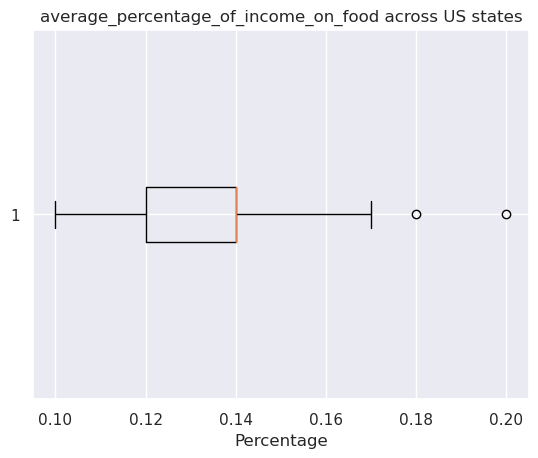

In [54]:
# Simple visulization
plt.boxplot(df_share['average_percentage_of_income_on_food'],vert=False)
plt.title("average_percentage_of_income_on_food across US states")
plt.xlabel("Percentage")

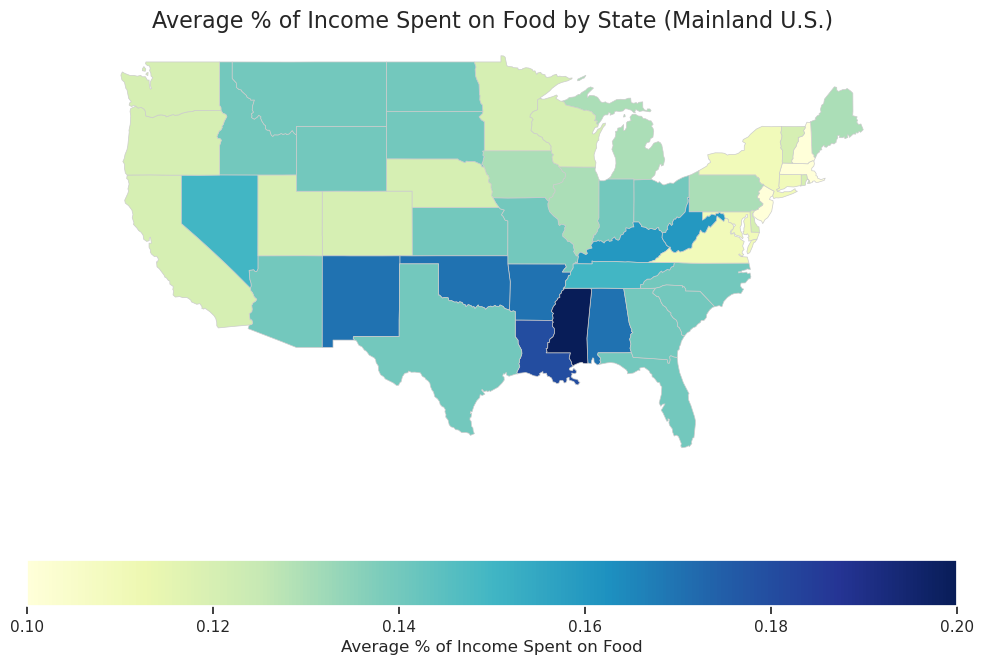

In [55]:
# Mainland U.S
data_path = "/home/jovyan/shared_data/data/geog407/assignment3/"
state_geo = f"{data_path}/us-states.json"
gdf_states = gpd.read_file(state_geo)
# Merge shapefile and income dataframe
gdf_merged = gdf_states.merge(df_share, left_on="name", right_on="state")
# Removed Alaska and Hawaii to aviod scaling issue
gdf_contig = gdf_merged[~gdf_merged["name"].isin(["Alaska", "Hawaii"])]
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the map
gdf_contig.plot(column="average_percentage_of_income_on_food",cmap="YlGnBu",
                edgecolor="0.8",
                linewidth=0.5,
                legend=True,
                legend_kwds={
                    "label": "Average % of Income Spent on Food",
                    "orientation": "horizontal"
                },
                ax=ax)
# Set title
ax.set_title("Average % of Income Spent on Food by State (Mainland U.S.)", fontsize=16)
ax.axis("off")
# Show the map
plt.show()

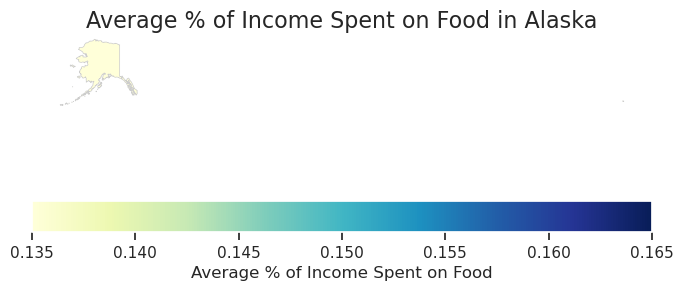

In [56]:
#State of Alaska
gdf_alaska = gdf_merged[gdf_merged["name"] == "Alaska"]
fig, ax = plt.subplots(figsize=(8, 8))
gdf_alaska.plot(
    column="average_percentage_of_income_on_food",
    cmap="YlGnBu",
    edgecolor="0.8",
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Average % of Income Spent on Food", "orientation":"horizontal"},
               ax=ax)
ax.set_title("Average % of Income Spent on Food in Alaska", fontsize=16)
ax.axis("off")
plt.show()

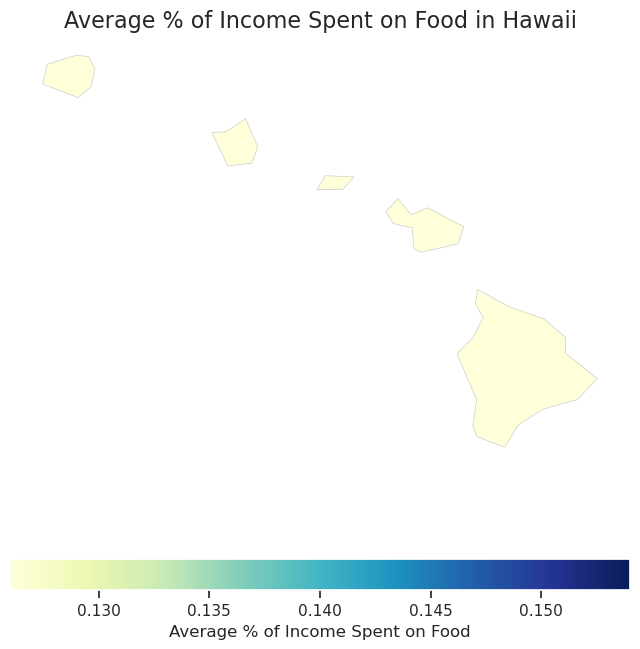

In [57]:
#State of Hawaii
gdf_alaska = gdf_merged[gdf_merged["name"] == "Hawaii"]
fig, ax = plt.subplots(figsize=(8, 8))
gdf_alaska.plot(
    column="average_percentage_of_income_on_food",
    cmap="YlGnBu",
    edgecolor="0.8",
    linewidth=0.5,
    legend=True,
    legend_kwds={"label": "Average % of Income Spent on Food", "orientation":"horizontal"},
               ax=ax)
ax.set_title("Average % of Income Spent on Food in Hawaii", fontsize=16)
ax.axis("off")
plt.show()

In [58]:
import pandas as pd
import folium
import json
data_path = "/home/jovyan/shared_data/data/geog407/assignment3/"
state_geo = f"{data_path}/us-states.json"
# Load GeoJSON
with open(state_geo) as f:
    geo_data = json.load(f)
# Add average_percentage_of_income_on_food into GeoJSON properties
for feature in geo_data["features"]:
    state_name = feature["properties"]["name"]
    match = df_share[df_share["state"] == state_name]
    if not match.empty:
        feature["properties"]["average_percentage_of_income_on_food"] = float(
            match["average_percentage_of_income_on_food"].values[0])
m = folium.Map(location=[48, -102], zoom_start=3)
# Plot the map
choropleth = folium.Choropleth(
    geo_data=geo_data,
    name="choropleth",
    data=df_share,
    columns=["state", "average_percentage_of_income_on_food"],
    key_on="feature.properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average percentage of Income Spent on Food",).add_to(m)
# Click popup to show both name and food share percentage
folium.GeoJsonTooltip(
    fields=["name"],
    aliases=["State:"],
    sticky=True).add_to(choropleth.geojson)
folium.GeoJsonPopup(
    fields=["name", "average_percentage_of_income_on_food"],
    aliases=["State:", "Avg % Income on Food:"],
    localize=True).add_to(choropleth.geojson)
# Layer control
folium.LayerControl().add_to(m)
m
#m.save("Spending_map.html")

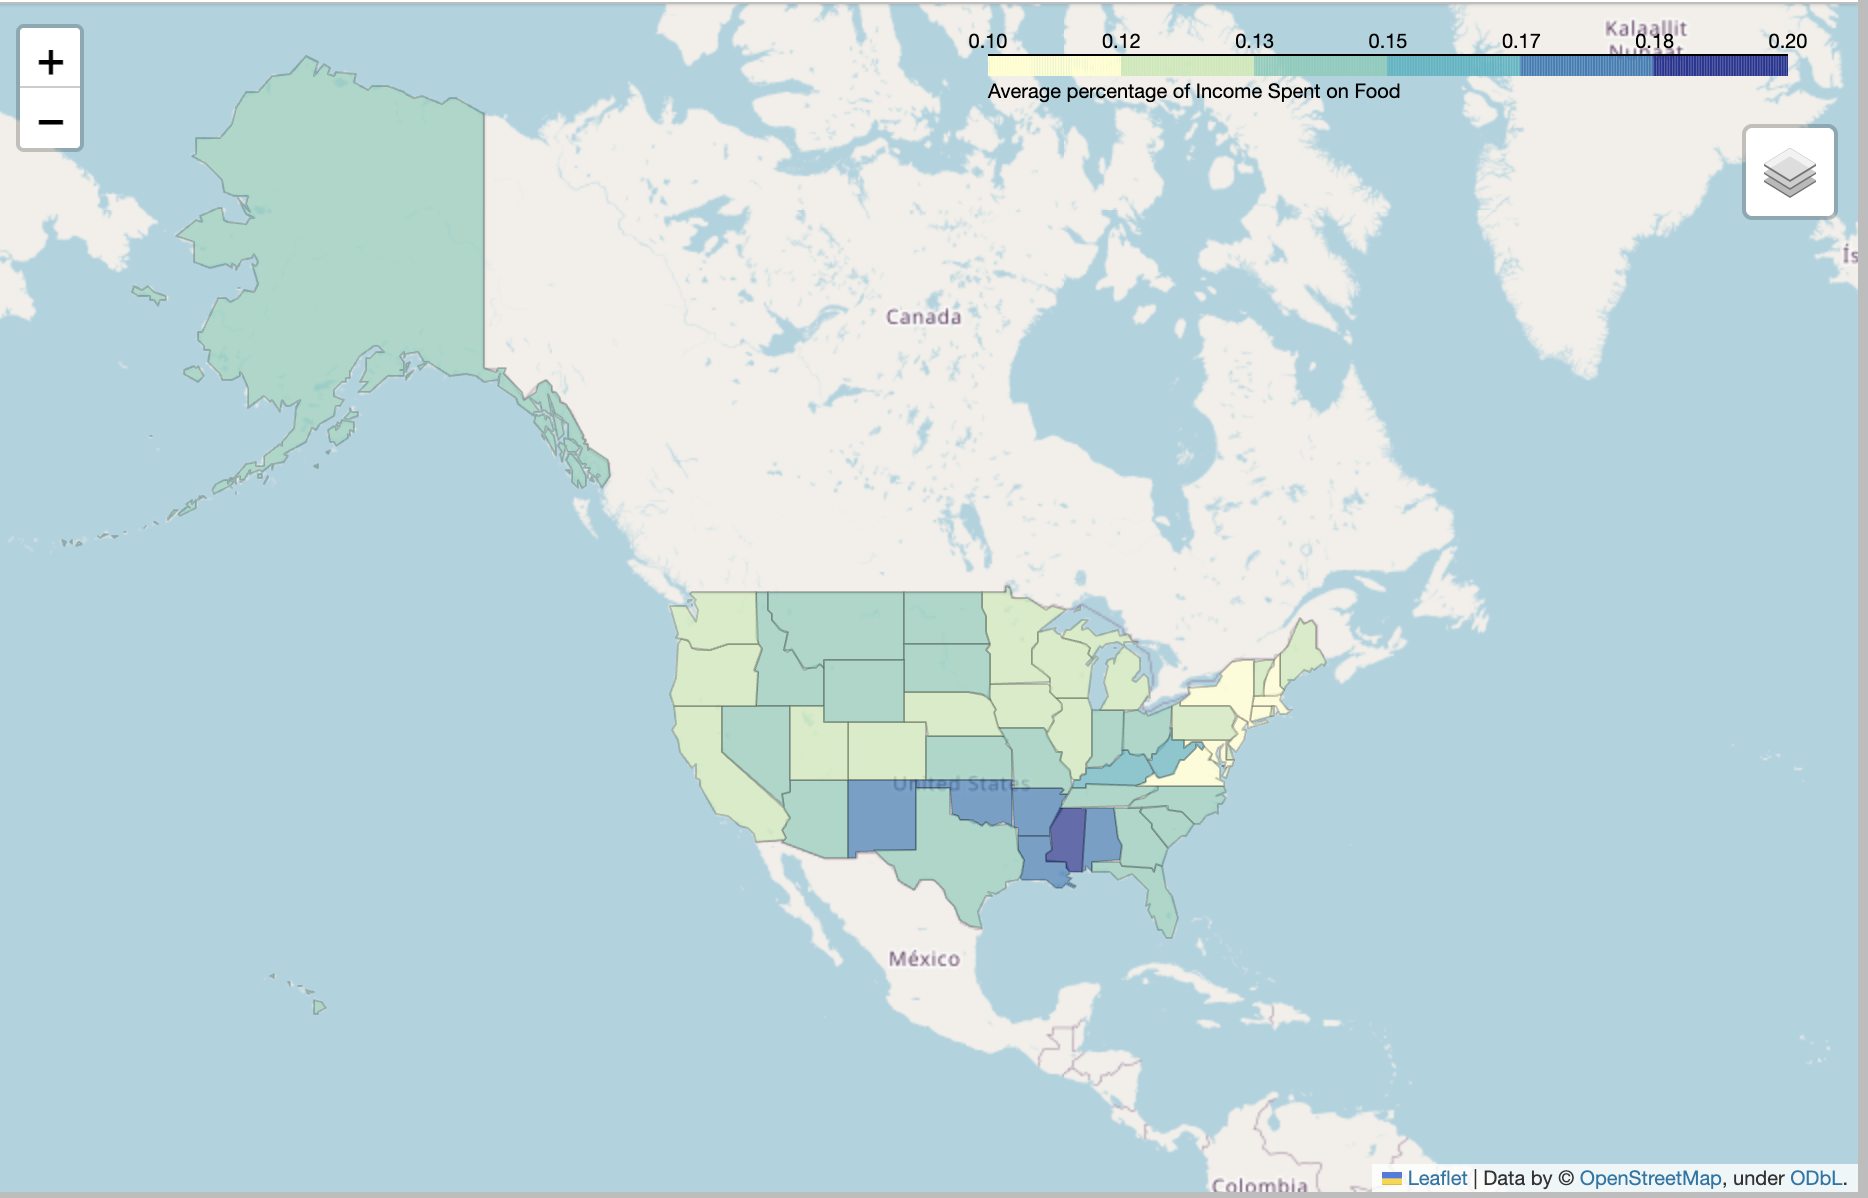

In [59]:
#Display my folium map
Image("Spending_map.png")

From the map visualizations, a consistent pattern emerges: states with higher incomes tend to spend a smaller percentage of their income on food. For example, in California—a high-income state—the average percentage of income spent on food is roughly 12%, whereas in Alabama—a lower-income state—it is closer to 17%. This general trend supports Engel’s Law, which states that as a household’s income increases, the percentage of that income spent on food decreases.


### Additional data analysis: k-mean clustering

I used k-mean clustering to give us more insight about the trend.

In [60]:
# Merge two datasets together
df_merged = df_income.merge(df_share, on='state', how='inner')
df_merged.head()

state   FIPS  median_income  rank   
0    Mississippi  28000        54915.0    51  \
1  West Virginia  54000        57917.0    50   
2       Arkansas   5000        58773.0    49   
3      Louisiana  22000        60023.0    48   
4        Alabama   1000        62027.0    47   

   average_percentage_of_income_on_food  
0                                  0.20  
1                                  0.16  
2                                  0.17  
3                                  0.18  
4                                  0.17

In [61]:
from sklearn.cluster import KMeans
# Define the run_kmeans function
def run_kmeans(dataset, max_iterations=100, num_clusters=5, num_seeds=10):
    X = dataset[['median_income', 'average_percentage_of_income_on_food']]
    km = KMeans(
        n_clusters=num_clusters,
        init='k-means++',
        max_iter=max_iterations,
        n_init=num_seeds,
        random_state=42
    )
    clusters = km.fit_predict(X)
    dataset['cluster_id'] = clusters
    return dataset, km

# Run K-Means
clustered_income, km_model = run_kmeans(df_merged, num_clusters=5)
# Display results
clustered_income

state   FIPS  median_income  rank   
0      Mississippi  28000        54915.0    51  \
1    West Virginia  54000        57917.0    50   
2         Arkansas   5000        58773.0    49   
3        Louisiana  22000        60023.0    48   
4          Alabama   1000        62027.0    47   
5       New Mexico  35000        62125.0    46   
6         Kentucky  21000        62417.0    45   
7         Oklahoma  40000        63603.0    44   
8   South Carolina  45000        66818.0    43   
9        Tennessee  47000        67097.0    42   
10        Missouri  29000        68920.0    41   
11            Ohio  39000        69680.0    40   
12  North Carolina  37000        69904.0    39   
13         Montana  30000        69922.0    38   
14         Indiana  18000        70051.0    37   
15        Michigan  26000        71149.0    36   
16         Florida  12000        71711.0    35   
17           Maine  23000        71773.0    34   
18    South Dakota  46000        72421.0    33   
19          Kansas  20000        72639.0    32   
20            Iowa  19000        73147.0    31   
21           Idaho  16000        74636.0    30   
22         Georgia  13000        74664.0    29   
23         Wyoming  56000        74815.0    28   
24        Nebraska  31000        74985.0    27   
25          Nevada  32000        75561.0    26   
26       Wisconsin  55000        75670.0    25   
27    North Dakota  38000        75949.0    24   
28    Pennsylvania  42000        76081.0    23   
29           Texas  48000        76292.0    22   
30         Arizona   4000        76872.0    21   
31         Vermont  50000        78024.0    20   
32          Oregon  41000        80426.0    19   
33        Illinois  17000        81702.0    18   
34        Delaware  10000        82855.0    17   
35        New York  36000        84578.0    16   
36    Rhode Island  44000        86372.0    15   
37       Minnesota  27000        87556.0    14   
38          Alaska   2900        89336.0    13   
39        Virginia  51000        90974.0    12   
40            Utah  49000        91750.0    11   
41        Colorado   8000        92470.0    10   
42     Connecticut   9000        93760.0     9   
43      Washington  53000        94952.0     8   
44   New Hampshire  33000        95628.0     7   
45      California   6000        96334.0     6   
46          Hawaii  15000        98317.0     5   
47      New Jersey  34000       101050.0     4   
48   Massachusetts  25000       101341.0     3   
49        Maryland  24000       101652.0     2   

    average_percentage_of_income_on_food  cluster_id  
0                                   0.20           3  
1                                   0.16           3  
2                                   0.17           3  
3                                   0.18           3  
4                                   0.17           3  
5                                   0.17           3  
6                                   0.16           3  
7                                   0.17           3  
8                                   0.14           1  
9                                   0.15           1  
10                                  0.14           1  
11                                  0.14           1  
12                                  0.14           1  
13                                  0.14           1  
14                                  0.14           1  
15                                  0.13           1  
16                                  0.14           1  
17                                  0.13           1  
18                                  0.14           1  
19                                  0.14           1  
20                                  0.13           1  
21                                  0.14           4  
22                                  0.14           4  
23                                  0.14           4  
24                                  0.12           4  
25                              

K-means clustering helped me identify similarities between states. The results show a negative trend in which higher-income states tend to spend a smaller percentage of their income on food. This result **supports the conclusion** I previously made from the map visualizations.

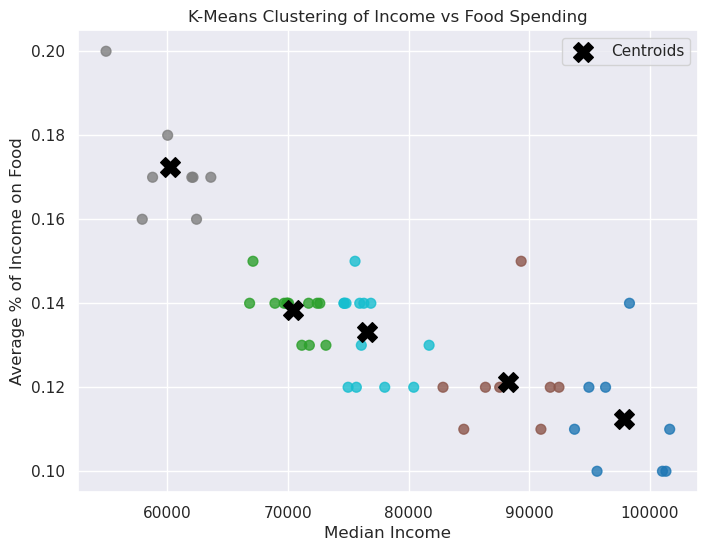

In [62]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of the two features, colored by cluster_id
plt.scatter(
    clustered_income['median_income'],
    clustered_income['average_percentage_of_income_on_food'],
    c=clustered_income['cluster_id'],
    cmap='tab10',
    s=50,
    alpha=0.8
)

# plot cluster centers
centers = km_model.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Centroids'
)
plt.title("K-Means Clustering of Income vs Food Spending")
plt.xlabel("Median Income")
plt.ylabel("Average % of Income on Food")
plt.legend()
# Use plt.grid for a more organized graph
plt.grid(True)
plt.show()

### Additional data analysis: Fitting a model

I also did more data analysis by fitting a model, our primary goal is to explore the relationship between income and the proportion of income spent on food. Even with a R^2 of 0.678, the model clearly shows the direction of the relationship, which is the exact insight we are looking for.

In [87]:
#Import libraries
import seaborn as sns
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [88]:
df_new = df_merged[['median_income','average_percentage_of_income_on_food']]

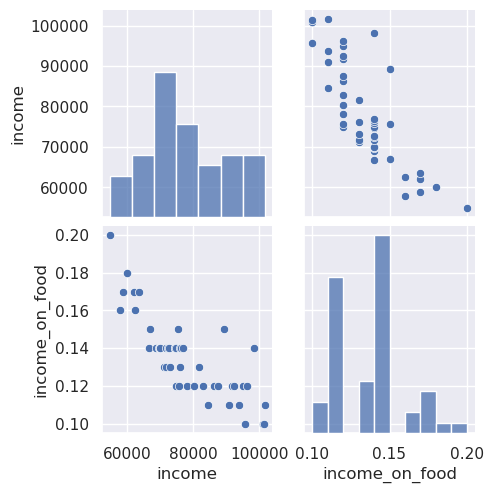

In [89]:
df_new=df_new.rename(columns={'median_income': 'income','average_percentage_of_income_on_food':'income_on_food'})
sns.pairplot(df_new)

In [90]:
lm = smf.ols(formula='income_on_food~income',data=df_new).fit()
lm

### Check to see if the data meets linearity assumption for linear regression model
Overall, the residual plot looks good, showing no major violations of the linearity assumptions. There are, however, a few points that are possible outliers, but overall the model appears satisfactory.

Text(0.5, 1.0, 'fitted value VS Residual plots')

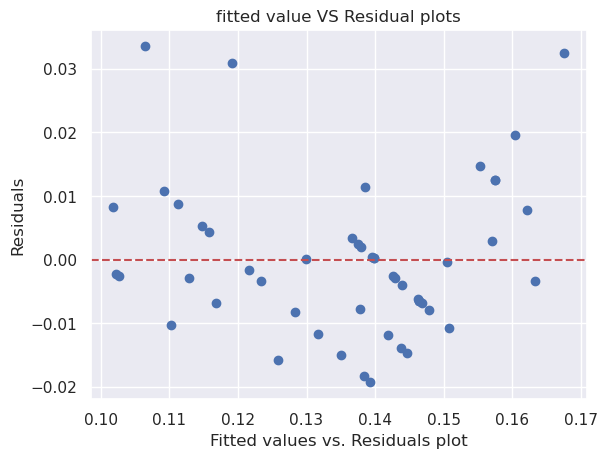

In [91]:
# Residuals vs. Fitted Values Plot
# This plot shows the distribution of residuals.
# If the points are evenly spread around the red dashed line
# it suggests that the linearity assumption of the model meets.
# plot the dots
plt.scatter(lm.fittedvalues, lm.resid)
# Draw the red dashed line
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Fitted values vs. Residuals plot')
plt.ylabel('Residuals')
plt.title('fitted value VS Residual plots')

In [92]:
# Fit a model
chosen_lm = smf.ols(formula='income_on_food~income',data=df_new).fit()
chosen_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         income_on_food   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           2.06e-13
Time:                        20:45:11   Log-Likelihood:                 150.37
No. Observations:                  50   AIC:                            -296.7
Df Residuals:                      48   BIC:                            -292.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2448      0.011     22.275      0.000       0.223       0.267
income     -1.407e-06    1.4e-07    -10.063      0.000   -1.69e-06   -1.13e-06
==============================================================================
Omnibus:                       10.731   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.394
Skew:                           0.996   Prob(JB):                      0.00553
Kurtosis:                       4.012   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating 95% confidence interval
For data with 50 rows(\(n=50\)) and one independent variable(Income), degrees of freedom is 48 (n-p=50-2=48\).
t-value for 48 degrees of freedom: **2.011**

In [93]:
# 95% estimation interval for income variable
upper_bound = (-1.407e-06)+(2.011*(1.4e-07))
lower_bound = (-1.407e-06)-(2.011*(1.4e-07))
print(upper_bound)
print(lower_bound)

-1.12546e-06
-1.68854e-06


#### The regression equation is:
\begin{align*}
\widehat{\text{income_on_food}} & = 0.2431\\ 
& - 1.409 \times 10^{-6} \times \text{income}\\
\end{align*}



#### The 95% confidence interval (for income coefficient) is:

\[-1.68854e-06, -1.12546e-06\]

The income coefficint is always below 0, indicating the forever **negative** relationship between income and income_on_food, this support the thoery of engle's law.


Conclusion: As you can see, the estimation interval is below 0, indicating the forever **negative** relationship between income and income_on_food, This additional data analysis supports the conclusion I made from the map visualizations and further reinforces Engel’s Law.